# So sánh các model

1. Nhập thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
import streamlit as st
from keras.layers import Input, Dense, Dropout


2. Load dataset

In [13]:
# Load dataset
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv("diabetes.csv", names=columns, skiprows=1)

In [14]:
# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

3. Model

In [ ]:
# Model definitions
def train_knn():
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    joblib.dump(model, "knn_model.pkl")
    return model

def train_svm_linear():
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train)
    joblib.dump(model, "svm_linear_model.pkl")
    return model

def train_svm_rbf():
    model = SVC(kernel='rbf', probability=True)
    model.fit(X_train, y_train)
    joblib.dump(model, "svm_rbf_model.pkl")
    return model

def train_logistic_regression():
    model = LogisticRegression()
    model.fit(X_train, y_train)
    joblib.dump(model, "logistic_regression_model.pkl")
    return model

def train_deep_learning():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicit input layer
        Dense(128, activation="relu"), Dropout(0.3),
        Dense(64, activation="relu"), Dropout(0.3),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
    model.save("deep_learning_model.h5")
    return model




4. Training model

In [35]:
# Training models
models = {
    "kNN": train_knn(),
    "SVM Linear": train_svm_linear(),
    "SVM RBF": train_svm_rbf(),
    "Logistic Regression": train_logistic_regression(),
    "Deep Learning": train_deep_learning()
}

# Evaluate models
accuracies = {}
for name, model in models.items():
    if name == "Deep Learning":
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6402 - loss: 0.6554 - val_accuracy: 0.6948 - val_loss: 0.5560
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7617 - loss: 0.5197 - val_accuracy: 0.7662 - val_loss: 0.5065
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.4939 - val_accuracy: 0.7403 - val_loss: 0.5256
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7704 - loss: 0.4941 - val_accuracy: 0.7662 - val_loss: 0.5296
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.4579 - val_accuracy: 0.7597 - val_loss: 0.5249
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 0.4471 - val_accuracy: 0.7597 - val_loss: 0.5334
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.4203 - val_accuracy: 0.7468 - val_loss: 0.5421
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7999 - loss: 0.4077 - val_accuracy: 0.7532 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [40]:
for key, value in accuracies.items():
    print(f"{key}: {value}")

kNN: 0.6883116883116883
SVM Linear: 0.7597402597402597
SVM RBF: 0.7272727272727273
Logistic Regression: 0.7532467532467533
Deep Learning: 0.7467532467532467


5. Biểu diễn đồ thị

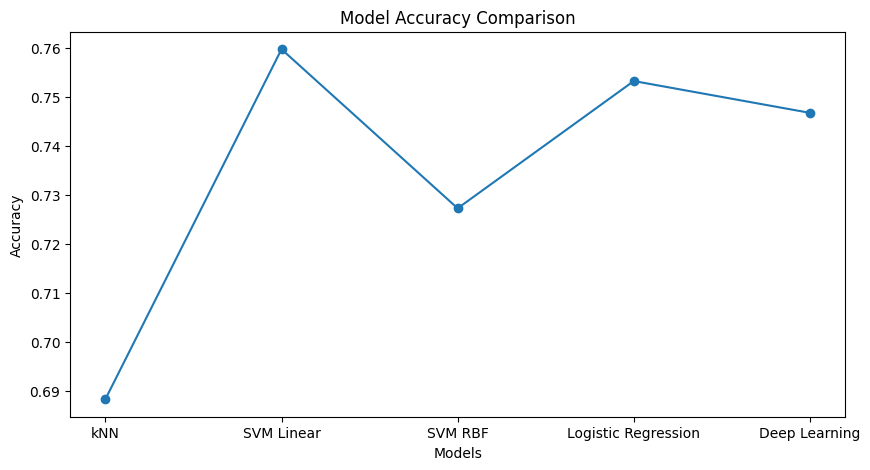

In [36]:
# Visualization
plt.figure(figsize=(10,5))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o', linestyle='-')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()